<a href="https://colab.research.google.com/github/juliahumphrys/data-2000/blob/main/Neural_networks_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_data

In [3]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


##Part 1: Feature Selection
I chose to keep the following columns: age, BMI, physical health, difficulty walking, high cholesterol, high blood pressure, and mental health. I believe these choices are all significant indicators of health.

In [4]:
new_data = X.loc[:, ["Age", "BMI", "PhysHlth", "DiffWalk", "HighChol", "HighBP", "MentHlth"]]
new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,HighBP,MentHlth
0,9,40,15,1,1,1,18
1,7,25,0,0,0,0,0
2,9,28,30,1,1,1,30
3,11,27,0,0,0,1,0
4,11,24,0,0,1,1,3


##Part 2: Data Cleaning
I first went to remove any null values, but realized there were none. I then normalized the numeric features to ensure they have a similar scale. Lastly, I found the z-score for age and removed any outliers.

In [5]:
missing_values = new_data.isnull().sum()
print(missing_values)

Age         0
BMI         0
PhysHlth    0
DiffWalk    0
HighChol    0
HighBP      0
MentHlth    0
dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler

numeric_features = ["Age", "BMI", "PhysHlth", "DiffWalk", "HighChol", "HighBP", "MentHlth"]

scaler = StandardScaler()

new_data[numeric_features] = scaler.fit_transform(new_data[numeric_features])


In [7]:
avg_age = new_data["Age"].mean()
st_dev = new_data["Age"].std()

z_scores = (new_data["Age"] - avg_age) / st_dev

limit = 3

new_data = new_data[abs(z_scores) < limit]

new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,HighBP,MentHlth
0,0.316900,1.757936,1.233999,2.223615,1.165254,1.153688,1.998592
1,-0.337933,-0.511806,-0.486592,-0.449718,-0.858182,-0.866785,-0.429630
2,0.316900,-0.057858,2.954590,2.223615,1.165254,1.153688,3.617407
3,0.971733,-0.209174,-0.486592,-0.449718,-0.858182,1.153688,-0.429630
4,0.971733,-0.663122,-0.486592,-0.449718,1.165254,1.153688,-0.024926


##Part 3: Feature Engineering
I engineered a boolean column, titled unhealthy_old, that determines if the person is unhealthy and old. Then, I engineered a column that finds the average of each persons physical health and mental health, predicting their overall health.

In [8]:
new_data["Unhealthy_old"] = ((new_data["Age"] > 35) & (new_data["PhysHlth"] > 7)).astype(int)
new_data["overall_health"] = (new_data["PhysHlth"] + new_data["MentHlth"]) / 2

new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,HighBP,MentHlth,Unhealthy_old,overall_health
0,0.316900,1.757936,1.233999,2.223615,1.165254,1.153688,1.998592,0,1.616295
1,-0.337933,-0.511806,-0.486592,-0.449718,-0.858182,-0.866785,-0.429630,0,-0.458111
2,0.316900,-0.057858,2.954590,2.223615,1.165254,1.153688,3.617407,0,3.285998
3,0.971733,-0.209174,-0.486592,-0.449718,-0.858182,1.153688,-0.429630,0,-0.458111
4,0.971733,-0.663122,-0.486592,-0.449718,1.165254,1.153688,-0.024926,0,-0.255759


##Part 4: Binary Classification

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.2)

X_train.describe()

,Age,BMI,PhysHlth,DiffWalk,HighChol,HighBP,MentHlth,Unhealthy_old,overall_health
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.0,202944.000000
mean,-0.000859,-0.000439,-0.001356,-0.001278,-0.000387,0.000964,0.000541,0.0,-0.000408
std,1.000575,1.001457,0.998815,0.998868,0.999943,1.000140,1.000777,0.0,0.821981
min,-2.302431,-2.478916,-0.486592,-0.449718,-0.858182,-0.866785,-0.429630,0.0,-0.458111
25%,-0.665349,-0.663122,-0.486592,-0.449718,-0.858182,-0.866785,-0.429630,0.0,-0.458111
50%,-0.010516,-0.209174,-0.486592,-0.449718,-0.858182,-0.866785,-0.429630,0.0,-0.400758
75%,0.644317,0.396091,-0.142474,-0.449718,1.165254,1.153688,-0.159827,0.0,0.010811
max,1.626566,10.534271,2.954590,2.223615,1.165254,1.153688,3.617407,0.0,3.285998


In [10]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [11]:
import tensorflow as tf

In [12]:
inputs = {
    'Age':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='Age'),
    'BMI':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='BMI'),
    'overall_health':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='overall_health')
}

In [13]:
# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(
    [inputs.get('Age'), inputs.get('BMI'), inputs.get('overall_health')])

hidden1 = tf.keras.layers.Dense(
    units = 32,
    name = 'hidden1')(preprocessing_layers)

hidden2 = tf.keras.layers.Dense(
    units = 8,
    name = 'hidden2')(hidden1)


dense_output = tf.keras.layers.Dense(
    units=1,
    name='dense_output')(hidden2)

# Define an output dictionary we'll send to the model constructor.
outputs = {
'dense_output': dense_output
}

In [14]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    # ???
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    # Binary crossentropy
    loss=tf.keras.losses.BinaryCrossentropy(),
    # Precision, Recall, F1
    metrics=[tf.keras.metrics.F1Score()]
)

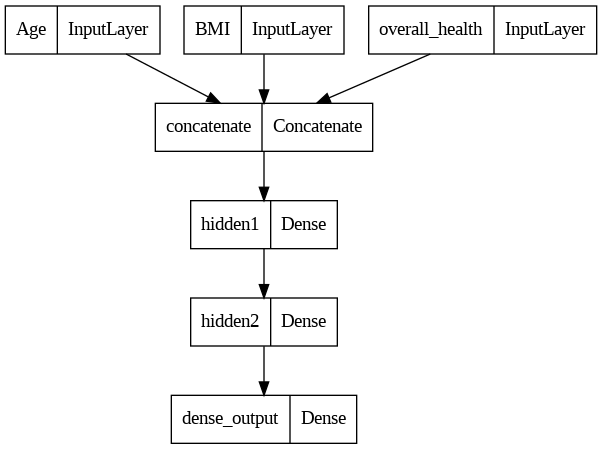

In [15]:
tf.keras.utils.plot_model(dnn_model)

In [22]:
tf.config.run_functions_eagerly(True)

history = dnn_model.fit(
    {name:np.array(value) for name, value in X_train.items()},
    np.array(y_train.values),
    epochs=15,
    batch_size=1000,
    shuffle=True,
    validation_split=0.2
)

# Get details that will be useful for plotting the loss curve.
epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["mean_squared_error"]

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['PhysHlth', 'DiffWalk', 'HighChol', 'HighBP', 'MentHlth', 'Unhealthy_old'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


ValueError: ignored

NameError: ignored

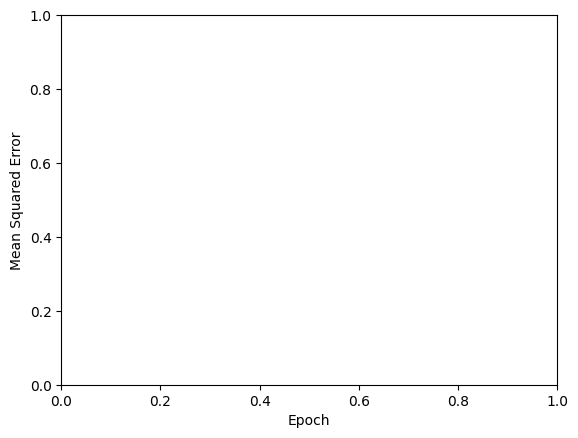

In [23]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(epochs, mse, label="Training Loss")
plt.plot(epochs, history.history["val_mean_squared_error"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mse_lists = mse.tolist() + history.history["val_mean_squared_error"]
highest_loss = max(merged_mse_lists)
lowest_loss = min(merged_mse_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

In [24]:
print("\n Evaluate the new model against the test set:")
dnn_model.evaluate(
    x={name:np.array(value) for name, value in X_test.items()},
    y=np.array(y_test.values),
    batch_size=1000,
    return_dict=True)


 Evaluate the new model against the test set:


ValueError: ignored